In [2]:
import pandas as pd
import numpy as np
import glob

In [3]:
pd.set_option('display.max_columns', 500)

#### Storing all the 13 tables in a dictionary

In [4]:
df_dict = {}

for num,file in enumerate(glob.glob("data/*.csv")):
    df = pd.read_csv(file,index_col=0)
    df_dict[file.split('/')[1]] = df

df_dict.keys()

dict_keys(['EmployeeTerritories.csv', 'OrderRegions.csv', 'Customers.csv', 'EmpTest.csv', 'Products.csv', 'Order Details.csv', 'Territories.csv', 'Employees.csv', 'Shippers.csv', 'Orders.csv', 'Categories.csv', 'Region.csv', 'Suppliers.csv'])

### Orders Table - This is the most important table. Contains the 830 orders that were placed

Shipping days will be calculated by Shipped Date - Order Date

Ship Via - will be used to get Shipping Company name from shippers table. Then would be converted to categorical.

Ship Country - 21 unique. Will be converted to categorical.

In [6]:
orders = df_dict['Orders.csv']
orders

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,DELDG,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,DELDG,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,RETCL,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,DELDG,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,DELDG,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium
5,10253,RETCL,3,1996-07-10,1996-07-24,1996-07-16,2,58.17,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
6,10254,NATWR,5,1996-07-11,1996-08-08,1996-07-23,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,NaN,3012,Switzerland
7,10255,DELDG,9,1996-07-12,1996-08-09,1996-07-15,3,148.33,Richter Supermarkt,Starenweg 5,Genève,NaN,1204,Switzerland
8,10256,DELDG,3,1996-07-15,1996-08-12,1996-07-17,2,13.97,Wellington Importadora,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil
9,10257,RETCL,4,1996-07-16,1996-08-13,1996-07-22,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,Táchira,5022,Venezuela


### Contains the details of all orders

In [7]:
order_details = df_dict['Order Details.csv']
order_details

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.00,12,0.00
1,10248,42,9.80,10,0.00
2,10248,72,34.80,5,0.00
3,10249,14,18.60,9,0.00
4,10249,51,42.40,40,0.00
5,10250,41,7.70,10,0.00
6,10250,51,42.40,35,0.15
7,10250,65,16.80,15,0.15
8,10251,22,16.80,6,0.05
9,10251,57,15.60,15,0.05


The no of products and the actual price of all the 830 orders have been calculated.

In [8]:
order_details['total_price'] = order_details.UnitPrice * order_details.Quantity
order_details_updated = order_details.groupby('OrderID').agg({'ProductID':'count', 'total_price': 'sum'})
order_details_updated.rename(columns={'ProductID':'no_of_products'},inplace=True)
order_details_updated.reset_index(inplace=True)
order_details_updated

,OrderID,no_of_products,total_price
0,10248,3,440.00
1,10249,2,1863.40
2,10250,3,1813.00
3,10251,3,670.80
4,10252,3,3730.00
5,10253,3,1444.80
6,10254,3,625.20
7,10255,4,2490.50
8,10256,2,517.80
9,10257,3,1119.90


### Data about countries. Country, CountryID and CountryRegionName.

Only Country is of relevance.

In [7]:
order_regions = df_dict['OrderRegions.csv']
order_regions.drop_duplicates(inplace=True)
order_regions

,Country,CountryRegionID,CountryRegionName
0,France,1,Europe
1,Germany,1,Europe
2,Argentina,2,South America
3,Brazil,2,South America
4,Venezuela,2,South America
5,Belgium,1,Europe
6,Sweden,1,Europe
7,Switzerland,1,Europe
8,Austria,1,Europe
9,Mexico,2,North America


### Shipping Companies data. 3 companies

Company Name will be converted to categorical

In [8]:
shippers = df_dict['Shippers.csv'] 
shippers #related to shippedvia column of orders.csv

,ShipperID,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


### Contains data about the various products

Not to be used

In [9]:
products = df_dict['Products.csv']
products

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Kitch Tee Shirt,1,1,1 box X 5 shirts,18.00,39,0,10,False
1,2,Button Down Shirt,1,1,1 box X 2 shirts,19.00,17,40,25,False
2,3,Kaki Chinos,1,2,1 pair,10.00,13,70,25,False
3,4,Dark Jeans,2,2,1 pair,22.00,53,0,0,False
4,5,Faded Jeans,2,2,1 pair,21.35,0,0,0,True
5,6,Grey Sweats,3,2,1 box X 5 pair,25.00,120,0,25,False
6,7,Leather Baseball Cap,3,7,1 box X 2 caps,30.00,15,0,10,False
7,8,Black Jeans,3,2,1 box X 2 pair,40.00,6,0,0,False
8,9,Mens Leather Boots,4,6,1 pair,97.00,29,0,0,True
9,10,Black Sheath,4,8,1 dress,31.00,31,0,0,False


### Regions data

Not to be used

In [10]:
regions = df_dict['Region.csv']
regions

,RegionID,RegionDescription
0,1,Eastern ...
1,2,Western ...
2,3,Northern ...
3,4,Southern ...


### Data about Suppliers

Not to be used

In [11]:
suppliers = df_dict['Suppliers.csv']
suppliers

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,NaN,EC1 4SD,UK,(171) 555-2222,NaN,NaN
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,NaN,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,NaN
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,NaN,100,Japan,(03) 3555-5011,NaN,NaN
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko Chuo-ku,Osaka,NaN,545,Japan,(06) 431-7877,NaN,Mayumi's (on the World Wide Web)#http://www.mi...
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St. Moonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,NaN
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,NaN,M14 GSD,UK,(161) 555-4448,NaN,NaN
8,9,PB Knäckebröd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Göteborg,NaN,S-345 67,Sweden,031-987 65 43,031-987 65 91,NaN
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,Sao Paulo,NaN,5442,Brazil,(11) 555 4640,NaN,NaN


### Data of employees

Not to be used

In [12]:
employees = df_dict['Employees.csv']
employees

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.\r\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House\r\nMiner Rd.,London,NaN,EC2 7JR,UK,(71) 555-7773,428,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow\r\nWinchester Way,London,NaN,RG1 9SP,UK,(71) 555-5598,465,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,4726 - 11th Ave. N.E.,Seattle,WA,98105,USA,(206) 555-1189,2344,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,NaN,WG2 7LT,UK,(71) 555-4444,452,b'\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


### Empoyees to Territories mapping

Not to be used

In [13]:
employeeTerritories = df_dict['EmployeeTerritories.csv']
employeeTerritories

,EmployeeID,TerritoryID
0,1,6897
1,1,19713
2,2,1581
3,2,1730
4,2,1833
5,2,2116
6,2,2139
7,2,2184
8,2,40222
9,3,30346


### Territories Data

Not to be used

In [14]:
territories = df_dict['Territories.csv']
territories

,TerritoryID,TerritoryDescription,RegionID
0,1581,Westboro ...,1
1,1730,Bedford ...,1
2,1833,Georgetow ...,1
3,2116,Boston ...,1
4,2139,Cambridge ...,1
5,2184,Braintree ...,1
6,2903,Providence ...,1
7,3049,Hollis ...,3
8,3801,Portsmouth ...,3
9,6897,Wilton ...,1


### Customer Data

Not to be used

In [15]:
customers = df_dict['Customers.csv']
customers

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
5,BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,NaN,68306,Germany,0621-08460,0621-08924
6,BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,NaN,67000,France,88.60.15.31,88.60.15.32
7,BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,NaN,28023,Spain,(91) 555 22 82,(91) 555 91 99
8,BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,NaN,13008,France,91.24.45.40,91.24.45.41
9,BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


### Category of Product Data

Not to be used

In [16]:
categories = df_dict['Categories.csv']
categories

,CategoryID,CategoryName,Description,Picture
0,1,Shirts,"Tee Shirts, Button Downs, Blouse, and Turtlenecks",NaN
1,2,Pants,"Jeans, Chinos, and Joggers",NaN
2,3,Shorts,"Bermudas, Chino Shorts, and Athletic",NaN
3,4,Skirts,"Pencil, Pleated, Maxi, and Mini",NaN
4,5,Coats,"Pea Coat, Leather, Windbreaker, and Puffer",NaN
5,6,Shoes,"Boots, Loafers, Sneakers, and Flip Flops",NaN
6,7,Hats,"Baseball, Skull, Fedora, and Beret",NaN
7,8,Dresses,"Sheath, Tee Shirt, Maxi, and A-Line",NaN


# Try 1

# Merged dfs

In [17]:
orders_shippers = pd.merge(orders,shippers,left_on='ShipVia',right_on='ShipperID')

In [18]:
orders_shippers_orderdetails = pd.merge(orders_shippers,order_details,left_on='OrderID',right_on='OrderID')

In [19]:
orders_shippers_orderdetails_orderregions = pd.merge(orders_shippers_orderdetails,order_regions,left_on='ShipCountry',right_on='Country')

In [20]:
orders_shippers_orderdetails_orderregions_products = pd.merge(orders_shippers_orderdetails_orderregions,products,left_on='ProductID',right_on='ProductID')

In [21]:
orders_shippers_orderdetails_orderregions_products_suppliers = pd.merge(orders_shippers_orderdetails_orderregions_products,suppliers,left_on='SupplierID',right_on='SupplierID')

In [22]:
orders_shippers_orderdetails_orderregions_products_suppliers_categories = pd.merge(orders_shippers_orderdetails_orderregions_products,categories,left_on='CategoryID',right_on='CategoryID')

# Columns of merged dfs

In [23]:
orders.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry'],
      dtype='object')

In [24]:
orders_shippers.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'ShipperID',
       'CompanyName', 'Phone'],
      dtype='object')

In [25]:
orders_shippers_orderdetails.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'ShipperID',
       'CompanyName', 'Phone', 'ProductID', 'UnitPrice', 'Quantity',
       'Discount', 'total_price'],
      dtype='object')

In [26]:
orders_shippers_orderdetails_orderregions.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'ShipperID',
       'CompanyName', 'Phone', 'ProductID', 'UnitPrice', 'Quantity',
       'Discount', 'total_price', 'Country', 'CountryRegionID',
       'CountryRegionName'],
      dtype='object')

In [27]:
orders_shippers_orderdetails_orderregions_products.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'ShipperID',
       'CompanyName', 'Phone', 'ProductID', 'UnitPrice_x', 'Quantity',
       'Discount', 'total_price', 'Country', 'CountryRegionID',
       'CountryRegionName', 'ProductName', 'SupplierID', 'CategoryID',
       'QuantityPerUnit', 'UnitPrice_y', 'UnitsInStock', 'UnitsOnOrder',
       'ReorderLevel', 'Discontinued'],
      dtype='object')

In [28]:
orders_shippers_orderdetails_orderregions_products_suppliers.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'ShipperID',
       'CompanyName_x', 'Phone_x', 'ProductID', 'UnitPrice_x', 'Quantity',
       'Discount', 'total_price', 'Country_x', 'CountryRegionID',
       'CountryRegionName', 'ProductName', 'SupplierID', 'CategoryID',
       'QuantityPerUnit', 'UnitPrice_y', 'UnitsInStock', 'UnitsOnOrder',
       'ReorderLevel', 'Discontinued', 'CompanyName_y', 'ContactName',
       'ContactTitle', 'Address', 'City', 'Region', 'PostalCode', 'Country_y',
       'Phone_y', 'Fax', 'HomePage'],
      dtype='object')

In [29]:
orders_shippers_orderdetails_orderregions_products_suppliers_categories.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate',
       'ShippedDate', 'ShipVia', 'Freight', 'ShipName', 'ShipAddress',
       'ShipCity', 'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'ShipperID',
       'CompanyName', 'Phone', 'ProductID', 'UnitPrice_x', 'Quantity',
       'Discount', 'total_price', 'Country', 'CountryRegionID',
       'CountryRegionName', 'ProductName', 'SupplierID', 'CategoryID',
       'QuantityPerUnit', 'UnitPrice_y', 'UnitsInStock', 'UnitsOnOrder',
       'ReorderLevel', 'Discontinued', 'CategoryName', 'Description',
       'Picture'],
      dtype='object')

# Df selected

In [30]:
a = orders_shippers_orderdetails_orderregions

In [31]:
a.drop(['OrderID','CustomerID','EmployeeID','ShipperID','ShipVia','Phone','ProductID','CountryRegionName','CountryRegionID'],axis=1)

,OrderDate,RequiredDate,ShippedDate,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,CompanyName,UnitPrice,Quantity,Discount,total_price,Country
0,1996-07-04,1996-08-01,1996-07-16,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,Federal Shipping,14.00,12,0.00,168.0,France
1,1996-07-04,1996-08-01,1996-07-16,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,Federal Shipping,9.80,10,0.00,98.0,France
2,1996-07-04,1996-08-01,1996-07-16,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France,Federal Shipping,34.80,5,0.00,174.0,France
3,1996-09-20,1996-10-04,1996-09-26,24.69,Du monde entier,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,Federal Shipping,11.20,6,0.00,67.2,France
4,1996-09-20,1996-10-04,1996-09-26,24.69,Du monde entier,"67, rue des Cinquante Otages",Nantes,NaN,44000,France,Federal Shipping,28.80,7,0.00,201.6,France
5,1996-10-29,1996-11-26,1996-11-08,166.31,Bon app',"12, rue des Bouchers",Marseille,NaN,13008,France,Federal Shipping,50.00,20,0.05,1000.0,France
6,1996-10-29,1996-11-26,1996-11-08,166.31,Bon app',"12, rue des Bouchers",Marseille,NaN,13008,France,Federal Shipping,7.70,12,0.05,92.4,France
7,1996-10-29,1996-11-26,1996-11-08,166.31,Bon app',"12, rue des Bouchers",Marseille,NaN,13008,France,Federal Shipping,36.80,40,0.05,1472.0,France
8,1996-11-22,1996-12-20,1996-12-02,131.70,Blondel père et fils,"24, place Kléber",Strasbourg,NaN,67000,France,Federal Shipping,36.40,30,0.00,1092.0,France
9,1996-11-22,1996-12-20,1996-12-02,131.70,Blondel père et fils,"24, place Kléber",Strasbourg,NaN,67000,France,Federal Shipping,99.00,35,0.00,3465.0,France


# Try 2 

Following are taken as features: <br>
Shippig Days <br>
ShipVia <br>
ShipCountry <br>
no_of_products <br>
total_price <br>

# Train Test Split

In [16]:
def data():
    
    from sklearn.model_selection import train_test_split
    
    def data_preparation():
        
        def splitter(days):

            try:
                days = int(str(days).split(' ')[0])
            except:
                days = np.nan

            return days
        
        orders = pd.read_csv('data/Orders.csv')
        order_details = pd.read_csv('data/Order Details.csv')
        
        order_details['total_price'] = order_details.UnitPrice * order_details.Quantity
        order_details_updated = order_details.groupby('OrderID').agg({'ProductID':'count', 'total_price': 'sum'})
        order_details_updated.rename(columns={'ProductID':'no_of_products'},inplace=True)
        order_details_updated.reset_index(inplace=True)
        
        foo = pd.merge(orders,order_details_updated,left_on='OrderID',right_on='OrderID')
        foo['shipping_days'] = pd.to_datetime(foo.ShippedDate) - pd.to_datetime(foo.OrderDate)
        foo['shipping_days'] = foo.shipping_days.apply(splitter)

        foo1 = foo[['ShipVia', 'Freight','ShipCountry','no_of_products', 'total_price', 'shipping_days']]

        foo2 = foo1.copy()
        foo2.shipping_days.fillna(int(foo1.shipping_days.mean()),inplace=True)

        foo3 = pd.get_dummies(foo2,columns=['ShipVia','ShipCountry'])

        return foo3
    
    foo3 = data_preparation()
    
    x = foo3[list(set(foo3.columns) - set(['Freight']))]
    y = foo3['Freight']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    return x_train, y_train, x_test, y_test

# Modelling

In [11]:
# Load Keras libraries used in this example

import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

Using TensorFlow backend.


In [12]:
from hyperopt import Trials, STATUS_OK, tpe, STATUS_FAIL
from hyperas import optim
from hyperas.distributions import choice, uniform, conditional
from hyperas.utils import space_eval

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rn
from keras import backend as K

In [14]:
def create_model(x_train, y_train, x_test, y_test):
    """
    Model providing function:

    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    """
    model = Sequential()
    model.add(Dense({{choice([32, 64, 128, 256,512])}}, input_shape=(x_train.shape[1],)))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))

    # If we choose 'four', add an additional fourth layer
    if {{choice(['one_hidden', 'two_hidden'])}} == 'two_hidden':
        model.add(Dense({{choice([32, 64, 128, 256,512])}}))
        model.add(Activation({{choice(['relu', 'sigmoid'])}}))
        model.add(Dropout({{uniform(0, 1)}}))
    
    model.add(Dense(1))
    model.add(Activation('linear'))

    model.compile(loss='mse', metrics=['mae'],
                  optimizer={{choice(['rmsprop', 'adam', 'nadam','sgd'])}})
    
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience={{choice([10,20,30,40,50])}})
    
    model.fit(x_train, y_train,
              batch_size={{choice([16,32,64,128])}},
              epochs=500,
              callbacks=[early_stop],
              verbose=0,
              validation_split=0.2)
#               validation_data=(x_test, y_test))
    [loss, mae] = model.evaluate(x_test, y_test, verbose=0)
#     print('loss:',loss)
#     print('mae:',mae)
    
    # In cases where the loss turns out to be nan (due to bad network architecture)
    # An Assertion error is raised by hyperopt. Because of the nan value of loss.
    # So, to avoid such a case, we update loss to infinity in that case.
    if(np.isnan(mae)):
        print('nan loss')
        return {'loss': np.inf, 'status': STATUS_OK, 'model': model}
    
    print("Testing set Mean Abs Error: ${:7.2f}".format(mae))
    return {'loss': loss, 'status': STATUS_OK, 'model': model}

In [17]:
if __name__ == '__main__':
    
    X_train, Y_train, X_test, Y_test = data()
    
    trials=Trials()
    best_run, best_model, space = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=100, #check how to pass maximum value
                                          trials=trials,
                                         notebook_name='1_prediction_freight_cost',
                                          eval_space = True, #gives actual values of params in best run instead of list indeces
                                          verbose=False,
                                          return_space=True) #returns the search space of hyperopt. Can be used To display all the trails.
    
    print("\n\nEvalutation of best performing model:")
    print(best_model.evaluate(X_test, Y_test, verbose=0))
    print("\n\nBest performing model chosen hyper-parameters:")
    print(best_run)    

Testing set Mean Abs Error: $  50.34
Testing set Mean Abs Error: $  75.07
Testing set Mean Abs Error: $  67.48
Testing set Mean Abs Error: $  75.02
Testing set Mean Abs Error: $  51.64
Testing set Mean Abs Error: $34313743597586874368.00
Testing set Mean Abs Error: $  74.25
Testing set Mean Abs Error: $  59.98
Testing set Mean Abs Error: $  74.81
Testing set Mean Abs Error: $  66.81
Testing set Mean Abs Error: $  74.24
Testing set Mean Abs Error: $  52.95
Testing set Mean Abs Error: $  52.39
Testing set Mean Abs Error: $  52.53
Testing set Mean Abs Error: $  64.76
Testing set Mean Abs Error: $  53.55
Testing set Mean Abs Error: $  48.36
Testing set Mean Abs Error: $  44.78
nan loss
Testing set Mean Abs Error: $  51.52
Testing set Mean Abs Error: $  44.43
Testing set Mean Abs Error: $  43.23
Testing set Mean Abs Error: $  43.41
Testing set Mean Abs Error: $  43.31
Testing set Mean Abs Error: $  43.66
Testing set Mean Abs Error: $  43.37
Testing set Mean Abs Error: $  45.21
Testing set M

In [18]:
best_model.evaluate(X_test, Y_test, verbose=0)

[8447.923135412744, 43.88586386715073]

In [19]:
best_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 512)               14336     
_________________________________________________________________
activation_138 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_78 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 513       
_________________________________________________________________
activation_139 (Activation)  (None, 1)                 0         
Total params: 14,849
Trainable params: 14,849
Non-trainable params: 0
_________________________________________________________________


In [20]:
# ----------------To get parameter value of each trial---------------------
for t, trial in enumerate(trials):
    vals = trial.get('misc').get('vals')
    print("Trial %s vals: %s" % (t, vals))
    tmp = {}
    for k,v in list(vals.items()):
        tmp[k] = v[0]
    print(space_eval(space, tmp))

Trial 0 vals: {'Activation': [0], 'Activation_1': [0], 'Dense': [1], 'Dense_1': [1], 'Dropout': [0.3207527760045966], 'Dropout_1': [1], 'Dropout_2': [0.7371698374615214], 'batch_size': [2], 'optimizer': [0], 'patience': [1]}
{'Activation': 'relu', 'Activation_1': 'relu', 'Dense': 64, 'Dense_1': 64, 'Dropout': 0.3207527760045966, 'Dropout_1': 'two_hidden', 'Dropout_2': 0.7371698374615214, 'batch_size': 64, 'optimizer': 'rmsprop', 'patience': 20}
Trial 1 vals: {'Activation': [0], 'Activation_1': [1], 'Dense': [1], 'Dense_1': [3], 'Dropout': [0.9770005173795487], 'Dropout_1': [1], 'Dropout_2': [0.42522861686845626], 'batch_size': [1], 'optimizer': [2], 'patience': [4]}
{'Activation': 'relu', 'Activation_1': 'sigmoid', 'Dense': 64, 'Dense_1': 256, 'Dropout': 0.9770005173795487, 'Dropout_1': 'two_hidden', 'Dropout_2': 0.42522861686845626, 'batch_size': 32, 'optimizer': 'nadam', 'patience': 50}
Trial 2 vals: {'Activation': [1], 'Activation_1': [1], 'Dense': [1], 'Dense_1': [4], 'Dropout': [0

# Predicting on the Test data

In [21]:
Y_test.reset_index(drop=True,inplace=True)

In [22]:
X_test.reset_index(drop=True,inplace=True)

In [23]:
test_predictions = best_model.predict(X_test).flatten()

In [24]:
predictions = pd.DataFrame(index=range(len(Y_test)))
predictions['actual'] = pd.DataFrame(Y_test)
predictions['preds'] = pd.DataFrame(test_predictions)
predictions

,actual,preds
0,162.75,288.296112
1,25.83,21.266312
2,74.58,71.038017
3,13.97,23.555168
4,32.35,41.561737
5,16.74,92.561531
6,29.61,17.593498
7,19.79,35.139763
8,3.50,46.593002
9,1.66,1.610781


# Plot

Text(0,0.5,'Predicted')

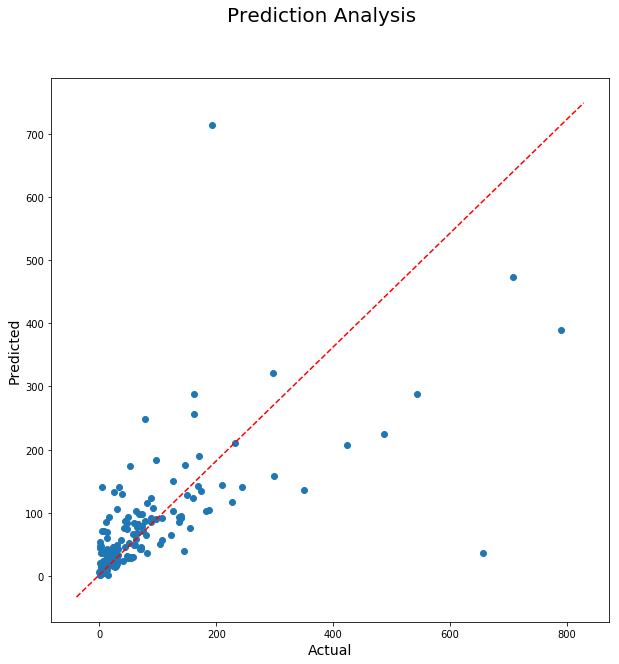

In [25]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(predictions.actual,predictions.preds)
fig.suptitle('Prediction Analysis', fontsize=20)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="r")
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)